In [3]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')

## reading data from the csv file

In [4]:
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)

# we are arranging the ratings according to time.
df.sort_values(by='date', inplace=True)
df.head()

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11
6901473,1367,510180,5.0,1999-11-11
49973109,9003,510180,3.0,1999-11-11
20393918,3870,510180,2.0,1999-11-11


In [5]:
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)

# we are arranging the ratings according to time.
df.sort_values(by='date', inplace=True)
df.head()

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11
6901473,1367,510180,5.0,1999-11-11
49973109,9003,510180,3.0,1999-11-11
20393918,3870,510180,2.0,1999-11-11


### Is there any entry that has Nan values...??

In [6]:
# it returns True for a row that has atleast one Nan value.
null_bool = df.isnull().any(axis = 1)
df[null_bool]

,movie,user,rating,date
95880696,16992,962,NaN,NaT
95963294,17002,51082,NaN,NaT


In [7]:
df.drop(df[null_bool].index, inplace=True)

In [8]:
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


### Let's try to find the duplicates if any...

In [9]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp )
print("There are {} duplicate rating entries in the data..".format(dups))

There are 1211 duplicate rating entries in the data..


In [10]:
# let's find what are the movies that has duplicate entries of user ratings....
df[dup_bool].movie.value_counts()

16969    762
16968    449
Name: movie, dtype: int64

__Removing those duplicate entries__  (inplace)

In [11]:
df.drop(df[dup_bool].index, inplace=True)

In [12]:
print("No of duplicate rows (movie, user, rating) entries :", sum(df.duplicated()))

No of duplicate rows (movie, user, rating) entries : 0


In [13]:
print("\nNo of ratings that we have, after removing nan rows and duplicates are :", df.shape[0])


No of ratings that we have, after removing nan rows and duplicates are : 100479045


## No. of Ratings, Users and Movies  

In [14]:
movies = df.movie.value_counts()
users = df.user.value_counts()
ratings = df.rating
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Total data 
--------------------------------------------------

Total no of ratings : 100479045
Total No of Users   : 480189
Total No of movies  : 17770


## Train data

In [15]:
big_train_df = df.iloc[:int(df.shape[0]*0.80)]

In [16]:
big_train_df.shape

(80383236, 4)

In [17]:
big_train_df.head(2)

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11


In [18]:
movies = big_train_df.movie.value_counts()
users = big_train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",big_train_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Training data 
--------------------------------------------------

Total no of ratings : 80383236
Total No of Users   : 405024
Total No of movies  : 17423


# 2. Creating sparse matrix for Train data

In [19]:
import os
from scipy import sparse
start = datetime.now()
if os.path.isfile('sample/train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('sample/train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((big_train_df.rating.values, (big_train_df.user.values,
                                               big_train_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')
 
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:03.095818


### Sparsity

In [20]:
u,m = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

In [21]:
print("Sparsity Of matrix : {} % ".format(  (1-(elem/(u*m))) * 100) )

Sparsity Of matrix : 99.82927583214679 % 


## Test

In [23]:
big_test_df = df.iloc[int(df.shape[0]*0.80) : ]
big_test_df.shape

(20095809, 4)

In [24]:
big_test_df.head(2)

,movie,user,rating,date
52863848,9617,316390,2.0,2005-08-08
12989568,2462,605375,4.0,2005-08-08


In [25]:
movies = big_test_df.movie.value_counts()
users = big_test_df.user.value_counts()

print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",big_test_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Test data 
--------------------------------------------------

Total no of ratings : 20095809
Total No of Users   : 349327
Total No of movies  : 17757


# 3. Creating sparse matrix for Test data

In [26]:
import os
from scipy import sparse
start = datetime.now()
if os.path.isfile('sample/test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('sample/test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((big_test_df.rating.values, (big_test_df.user.values,
                                               big_test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
 
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.847732


### Sparsity

In [27]:
u,m = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

In [28]:
print("Sparsity Of matrix : {} % ".format(  (1-(elem/(u*m))) * 100) )

Sparsity Of matrix : 99.95731855608713 % 


# Sampling Train and Test data 

In [6]:
import os
import random

## Train

In [7]:
import os
from scipy import sparse

start = datetime.now()
if os.path.isfile('sample/big/sample_train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz('sample/big/sample_train_sparse_matrix.npz')
    print("DONE..")
else: 
    train_row_ind, train_col_ind = train_sparse_matrix.nonzero()
    train_row_ind = np.unique(train_row_ind)
    train_col_ind = np.unique(train_col_ind)

    print("In big matrix, (users, movies) : ({} {})".format(len(train_row_ind), len(train_col_ind)))

    np.random.seed(15)
    sample_train_movies = np.random.choice(train_col_ind, 2000, replace=False)
    sample_train_users = np.random.choice(train_row_ind, 20000, replace=False)

    sample_train_sparse_matrix = train_sparse_matrix[sample_train_users, :][:,sample_train_movies]
    
    print('In sampled matrix, (users, movies) : ',[len(np.unique(i)) for i in sample_train_sparse_matrix.nonzero()])
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/big/sample_train_sparse_matrix.npz", sample_train_sparse_matrix)
    print('Done..\n')


print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.030006


In [8]:
sample_train_sparse_matrix.count_nonzero()

486139

## Test

In [9]:
import os
from scipy import sparse

start = datetime.now()
if os.path.isfile('sample/big/sample_test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz('sample/big/sample_test_sparse_matrix.npz')
    print("DONE..")
else: 
    test_row_ind, test_col_ind = test_sparse_matrix.nonzero()
    test_row_ind = np.unique(test_row_ind)
    test_col_ind = np.unique(test_col_ind)

    print("In big matrix (users, movies) : ({} {})".format(len(test_row_ind), len(test_col_ind)))

    np.random.seed(15)
    sample_test_movies = np.random.choice(test_col_ind, 3500, replace=False)
    sample_test_users = np.random.choice(test_row_ind, 10000, replace=False)

    sample_test_sparse_matrix = test_sparse_matrix[sample_test_users, :][:,sample_test_movies]
    print('In sampled matrix, (users, movies) : ',[len(np.unique(i)) for i in sample_test_sparse_matrix.nonzero()])
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/big/sample_test_sparse_matrix.npz", sample_test_sparse_matrix)
    print('Done..\n')


print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.015005


# Computing Average Ratings (from Train data)

In [10]:
averages = dict()

In [11]:
# Boolean matrix of ratings ( whether a user rated that movie or not)
is_rated = sample_train_sparse_matrix!=0

In [12]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
averages['global'] = global_average
averages

{'global': 3.568888733469234}

### User averages

In [13]:
# get the user averages in dictionary (key: userid, value: avg rating)
#_____________________________________________________________________#

# ".A1" is for converting Column_Matrix to 1-D numpy array 
sum_of_ratings_per_user = sample_train_sparse_matrix.sum(axis=1).A1
# no of ratings that each user has given.
no_of_ratings_per_user = is_rated.sum(axis=1).A1

# creae a dictonary of users and their average ratigns..
average_user_ratings = { i : sum_of_ratings_per_user[i]/no_of_ratings_per_user[i]  
                                 for i in range(sample_train_sparse_matrix.shape[0]) 
                                    if no_of_ratings_per_user[i] !=0}

# add user averages to th eaverages dictionary
averages['user'] = average_user_ratings

# test it..
averages['user'][97]

4.416666666666667

### Movie Averages

In [14]:
# get the Movie Average ratings in dictionary (key: movieId, value: avg_rating)
#_____________________________________________________________________#

# sum of the ratings that a movie got by any user(who rated that movie..)
sum_of_ratings_per_movie = sample_train_sparse_matrix.sum(axis=0).A1
# no of ratings that a movie got.
no_of_ratings_per_movie = is_rated.sum(axis=0).A1

average_movie_ratings = {i : sum_of_ratings_per_movie[i]/ no_of_ratings_per_movie[i] 
                                for i in range(sample_train_sparse_matrix.shape[1])
                                    if no_of_ratings_per_movie[i]!=0 }

# add thie'per_movie' avg ratings to averages dictionary
averages['movie'] = average_movie_ratings

# test this dictionary
averages['movie'][30]

3.7222222222222223

# Preparing Train and Test data for XGBoost

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [17]:
len((sample_train_users)), len(sample_train_movies), len(sample_train_ratings)

(486139, 486139, 486139)

## Preparing Train data 

In [20]:
start = datetime.now()
if os.path.isfile('sample/big/reg_train.csv'):
    print("It is already in the disk. you don't have to prepare it again")
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('sample/big/reg_train.csv', mode='a') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(averages['user'][user])
            # Avg_movie rating
            row.append(averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))    
print(datetime.now() - start)

It is already in the disk. you don't have to prepare it again
0:00:00


## Preparing Test data

In [21]:
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [22]:
len(sample_test_users), len(sample_test_movies), len(sample_test_ratings)

(110403, 110403, 110403)

In [23]:
start = datetime.now()
cold_start_count = 0

if os.path.isfile('sample/big/reg_test.csv'):
    print("It is already in the disk. you don't have to prepare it again")
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('sample/big/reg_test.csv', mode='a') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_test_sparse_matrix[user], sample_test_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_test_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings, end="--")

            except KeyError:
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                cold_start_count = cold_start_count + 1
                top_sim_users_ratings.extend([averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_test_sparse_matrix[:,movie].T, sample_test_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_test_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except KeyError:
                cold_start_count = cold_start_count + 1
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(averages['user'][user])
            except KeyError:
                row.append(averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(averages['movie'][movie])
            except KeyError:
                row.append(averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%5000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
print("",datetime.now() - start)
print("\nNo. of cold start problems handled :", cold_start_count)

It is already in the disk. you don't have to prepare it again
 0:00:00

No. of cold start problems handled : 0


#### Percentage if Cold Start Cases handled

In [158]:
print("Cold Start Cases : {}%".format((cold_start_count/len(sample_test_ratings)) * 100 ))

Cold Start Cases : 49.635426573553254%


 ## Reading from the file to make a dataframe

In [53]:
reg_train = pd.read_csv('sample/big/reg_train.csv',names = [ 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                         'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                        'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,3.568889,3.0,4.0,1.0,4.0,3.0,5.0,2.0,5.0,4.0,3.0,3.759690,3.0,3.0
1,3.568889,4.0,3.0,3.0,4.0,3.0,1.0,4.0,3.0,5.0,5.0,3.311377,3.0,1.0
2,3.568889,4.0,1.0,3.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,2.661871,3.0,3.0
3,3.568889,4.0,3.0,3.0,1.0,3.0,3.0,5.0,4.0,4.0,1.0,3.615385,3.0,4.0
4,3.568889,4.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0


In [54]:
reg_train.shape

(486139, 14)

# XGBoost Regressor

Install xgboost in windows : https://www.youtube.com/watch?v=k51sX_ApQYU 

In [50]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [51]:
import xgboost as xgb

In [52]:
reg_xgb = xgb.XGBRegressor(silent=False, n_jobs=10, random_state=15)

In [55]:
x_train = reg_train.drop(['rating'], axis=1)

y_train = reg_train['rating']

In [56]:
start = datetime.now()

In [57]:
reg_xgb.fit(x_train, y_train, eval_metric = 'rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=10, nthread=None, objective='reg:linear', random_state=15,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [58]:
print(datetime.now() - start)

0:00:09.433541


In [59]:
start =datetime.now()
y_train_pred = reg_xgb.predict(x_train)
print(datetime.now()-start)

0:00:00.242061


In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = np.mean(np.abs( (y_train.values - y_train_pred)/y_train.values )) * 100

In [62]:
rmse_train, mape_train

(0.8704784998407008, 26.43305715452889)

<IPython.core.display.Javascript object>


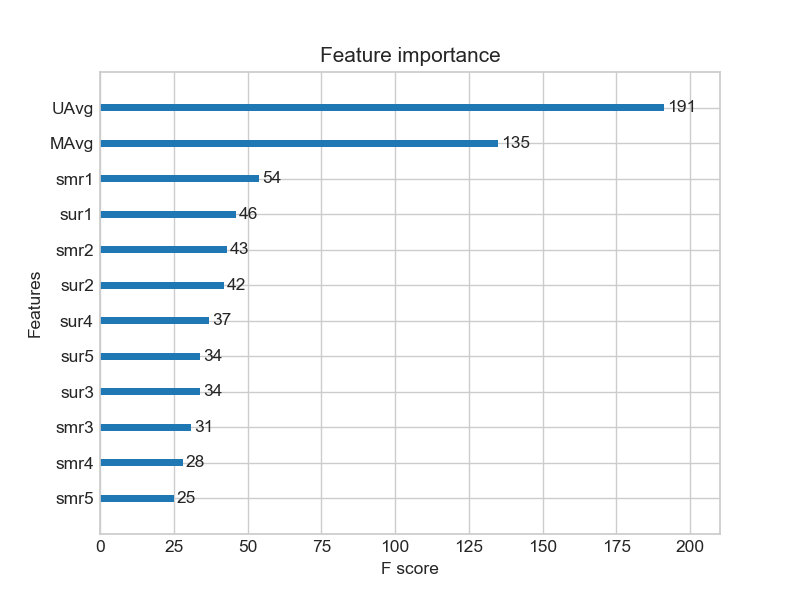

In [65]:
xgb.plot_importance(reg_xgb)

plt.show()

## Testing it with the test data

In [66]:
reg_test_df = pd.read_csv('sample/big/reg_test.csv',names = ['GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                         'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                        'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,3.568889,4.0,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.154472,3.0,3.0
1,3.568889,4.0,3.0,4.0,3.0,4.0,4.0,2.0,5.0,5.0,1.0,4.285714,3.0,5.0
2,3.568889,3.0,1.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,3.500000,3.0,3.0
3,3.568889,4.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,4.173913,3.0,5.0


In [67]:
x_test = reg_test_df.drop(['rating'], axis=1)

y_test = reg_test_df['rating']

## For basic model

In [68]:
y_test_pred = reg_xgb.predict(x_test)
mape_test = np.mean(np.abs( (y_test.values - y_test_pred)/y_test.values )) * 100
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_test, mape_test

(1.0671246633875136, 31.616862205367706)

## Trying Linear Regression with the data 


In [78]:
# to get rmse and mape for XGboost..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

In [69]:
x_train.head(2)

,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg
0,3.568889,3.0,4.0,1.0,4.0,3.0,5.0,2.0,5.0,4.0,3.0,3.759690,3.0
1,3.568889,4.0,3.0,3.0,4.0,3.0,1.0,4.0,3.0,5.0,5.0,3.311377,3.0


In [71]:
y_train.head(2)

0    3.0
1    1.0
Name: rating, dtype: float64

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr_reg = LinearRegression(fit_intercept=True, normalize=True, n_jobs = 10)

In [75]:
lr_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=True)

- __Train Data__

In [76]:
lr_reg_train_preds = lr_reg.predict(x_train)

In [79]:
lr_reg_train_rmse, lr_reg_train_mape = get_error_metrics(y_train, lr_reg_train_preds)
lr_reg_train_rmse, lr_reg_train_mape

(0.8732285631100922, 26.540119744131275)

- __Test Data__

In [83]:
lr_reg_test_preds = lr_reg.predict(x_test)

In [85]:
lr_reg_test_rmse, lr_reg_test_mape = get_error_metrics(y_test, lr_reg_test_preds)
lr_reg_test_rmse, lr_reg_test_mape

(1.0629627653197444, 31.266110475214827)

## Preparing Trainset and testset for Surprise based alorithms

### TrainSet

In [96]:
surp_train = pd.DataFrame({'user': sample_train_users,
                           'movie': sample_train_movies,
                           'rating': sample_train_ratings}, )
surp_train = surp_train[['user','movie','rating']]
surp_train.head(2)

,user,movie,rating
0,1590,0,3.0
1,1907,0,1.0


In [99]:
from surprise import Reader, Dataset

In [110]:
trainset = Dataset.load_from_df(surp_train,Reader(rating_scale=(1,5))).build_full_trainset()

In [111]:
trainset.n_users, trainset.n_items, trainset.n_ratings

(18755, 1949, 486139)

### TestSet

In [106]:
surp_test = pd.DataFrame({'user': sample_test_users,
                           'movie': sample_test_movies,
                           'rating': sample_test_ratings})
surp_test = surp_test[['user','movie','rating']]
surp_test.head(2)

,user,movie,rating
0,118,0,3.0
1,192,0,5.0


In [112]:
testset = list(zip(sample_test_users, sample_test_movies, sample_test_ratings))

## Generic function to run any surprise based algorithm 

    - given prefectly initialized ALGO, TRAINSET and TESTSET
    

In [140]:
##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction classes 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean(pred - actual)**2)
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

### Some Global dictionary that stores rmse and mape for all the models....

- It stores the metrics in a dictionary of dictionaries

> __keys__ : model names(string)

> __value__: dict(__key__ : metric, __value__ : value )

In [142]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

## 1. Baseline Model  ( with User and Item biases )

In [143]:
from surprise import BaselineOnly

- #### Predicted_rating : ( baseline prediction )

>$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $

- ####  Optimization function ( Least Squares Problem )

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$

In [145]:
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl = BaselineOnly(bsl_options=bsl_options)

In [146]:
bsl_train_results, bsl_test_results = run_surprise(bsl, trainset, testset, verbose=True)

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:02.715700 

Evaluating the model with train data..
time taken : 0:00:03.341869
---------------
Train Data
---------------
RMSE : 0.008262711523719485

MAPE : 29.3585572595359

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:01.041294
---------------
Test Data
---------------
RMSE : 0.1771676808411062

MAPE : 34.61122256138336

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:07.100834


In [147]:
# store them in models dictionary..
models_evaluation_train['bsl'] = bsl_train_results
models_evaluation_test['bsl'] = bsl_test_results

models_evaluation_test['bsl']

{'mape': 34.61122256138336,
 'predictions': array([4.0362061 , 3.63812962, 3.53202119, ..., 3.57248683, 3.52791376,
        3.5332751 ]),
 'rmse': 0.1771676808411062}

# 2. KNN with Baseline_model 

In [150]:
from surprise import KNNBaseline

- __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating


- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  


- _sim (u, v)_ - __Similarity__ between users __u and v__  
    - Generally, it will be cosine similarity or Pearson correlation coefficient. 
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
        - Computation of the correlation coefficient is based only on the common user support.
        - similarities based on a greater user support are more reliable ie., Users who has more number of common movie ratings are considered as more similar than users who has few no of movies  in common which are rated.
        - \begin{align}\begin{aligned}\text{pearson_baseline_shrunk_sim}(u, v) &= \frac{|I_{uv}| - 1}{|I_{uv}| - 1 + \text{shrinkage}} \cdot \hat{\rho}_{uv}\end{aligned}\end{align}
            - $\pmb{|I_{uv}|}$ - No of common movies between users(u and v)
            - __shrinkage__ - kind of hyperparameter. The defalut value suggested is ___100___
                - __0__ : There is no shrinkage at all ( It is normal pearson correlation coefficient ) 
            - $ \pmb {\hat \rho_uv}$ - Pearson Correlation Coefficient ( between users )
                - \begin{align} \text{pearson_baseline_sim}(u, v) = \hat{\rho}_{uv} = \frac{
    \sum\limits_{i \in I_{uv}} (r_{ui} -  b_{ui}) \cdot (r_{vi} -
    b_{vi})} {\sqrt{\sum\limits_{i \in I_{uv}} (r_{ui} -  b_{ui})^2}
    \cdot \sqrt{\sum\limits_{i \in I_{uv}} (r_{vi} -  b_{vi})^2}} \end{align}
 

 ------------ or 
 --

- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___

- We can do both and blend them ( see if we can better results when combined ) 

## 2.1 KNN with User User similarities 

In [149]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 

bsl_options = {'method': 'sgd'} # we keep other parameters like regularization parameter and learning_rate as default values.

In [152]:
knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:04:04.990253 

Evaluating the model with train data..
time taken : 0:08:48.295399
---------------
Train Data
---------------
RMSE : 0.021891842171299455

MAPE : 12.070669791163008

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:09.347439
---------------
Test Data
---------------
RMSE : 0.25956829995437974

MAPE : 36.31289890650797

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:13:02.634091


In [153]:
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results
models_evaluation_test['knn_bsl_u']  = knn_bsl_u_test_results

models_evaluation_test['knn_bsl_u'] 

{'mape': 36.31289890650797,
 'predictions': array([4.46080639, 3.46900566, 3.46660633, ..., 3.5859398 , 3.48940251,
        3.47741795]),
 'rmse': 0.25956829995437974}

## 2.2 KNN with Item Item similarities 

In [149]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 

bsl_options = {'method': 'sgd'} # we keep other parameters like regularization parameter and learning_rate as default values.

In [154]:
knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:04:08.932198 

Evaluating the model with train data..
time taken : 0:08:53.843315
---------------
Train Data
---------------
RMSE : 0.021891842171299455

MAPE : 12.070669791163008

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:09.513562
---------------
Test Data
---------------
RMSE : 0.25956829995437974

MAPE : 36.31289890650797

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:13:12.289075


In [155]:
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results
models_evaluation_test['knn_bsl_m']  = knn_bsl_m_test_results

models_evaluation_test['knn_bsl_m'] 

{'mape': 36.31289890650797,
 'predictions': array([4.46080639, 3.46900566, 3.46660633, ..., 3.5859398 , 3.48940251,
        3.47741795]),
 'rmse': 0.25956829995437974}

# 3. Matrix Factorization Techniques

## 3.1 SVD -  MF algorithm with user item interactions 

- __ Predicted Rating : __
    - 
    - $ \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $ 


- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $ \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

## SVD  - with user item interactions

In [133]:
from surprise import SVD

In [141]:
svd = SVD(n_factors=115, n_epochs=20, random_state=15)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

Training the model...
Done. time taken : 0:00:31.635192 

Evaluating the model with train data..
time taken : 0:00:03.819961
---------------
Train Data
---------------
RMSE : 0.01671259218143058

MAPE : 19.441192939322928

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.729189
---------------
Test Data
---------------
RMSE : 0.21920608712220402

MAPE : 35.22882567005053

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:36.184342
